In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

In [2]:
plt.rcParams['figure.figsize'] = [10 ,6]

# **Upload the image**

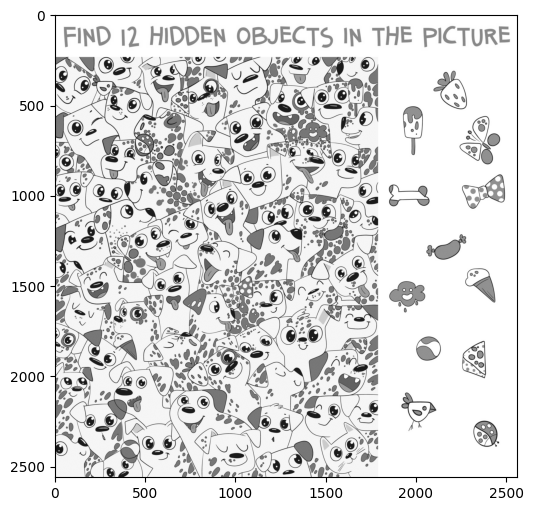

In [3]:
color_image = cv2.imread('2.jpg')
grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY) #Convert to grayscale image
plt.imshow(grayscale_image, cmap = 'gray')

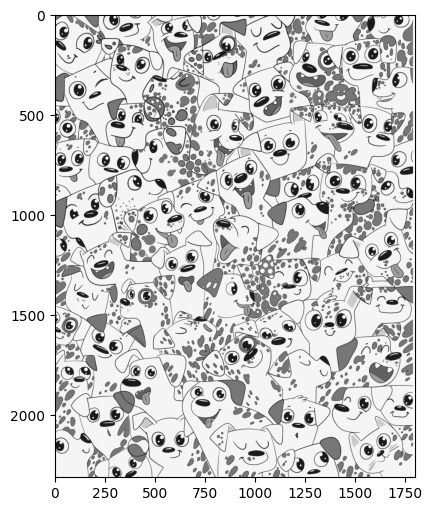

In [4]:
#Crop the image
crop_image = grayscale_image[250: grayscale_image.shape[0], 0:1800]
objects = []
plt.imshow(crop_image,cmap = 'gray')

# **Extract the objects**

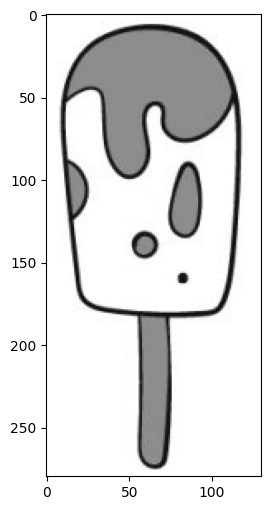

In [5]:
object1 = grayscale_image[500:780, 1920:2050]
plt.imshow(object1, cmap = 'gray')
objects.append(object1)

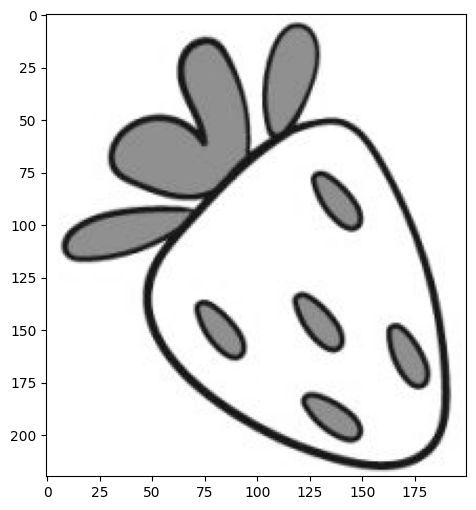

In [6]:
object2 = grayscale_image[305:525, 2090:2290]
plt.imshow(object2, cmap = 'gray')
objects.append(object2)

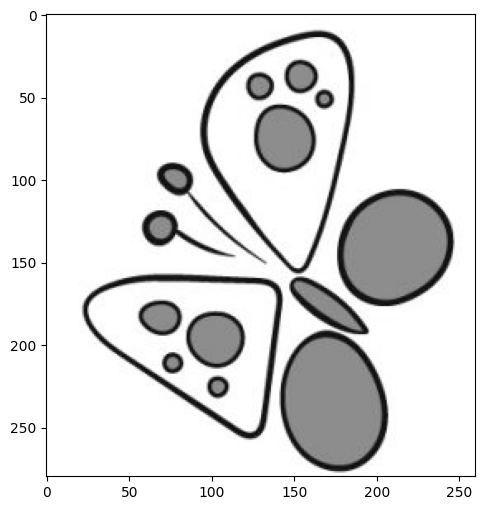

In [7]:
object3 = grayscale_image[550:830,2220:2480]
plt.imshow(object3, cmap = 'gray')
objects.append(object3)

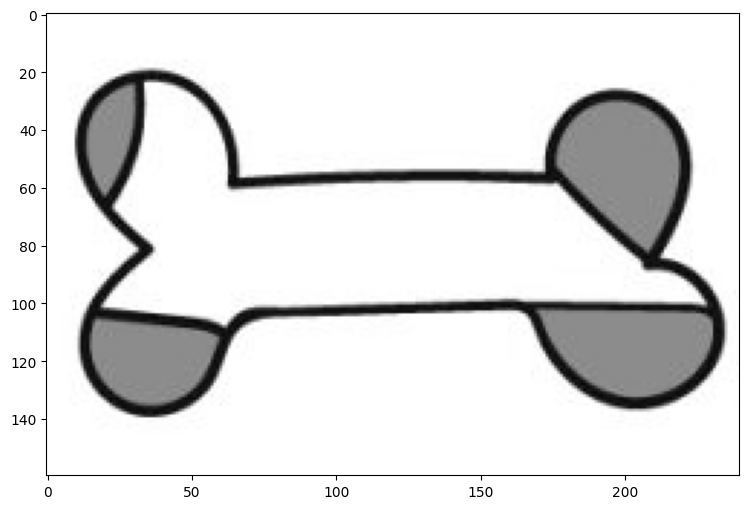

In [8]:
object4 = grayscale_image[920:1080, 1840:2080]
plt.imshow(object4, cmap='gray')
objects.append(object4)

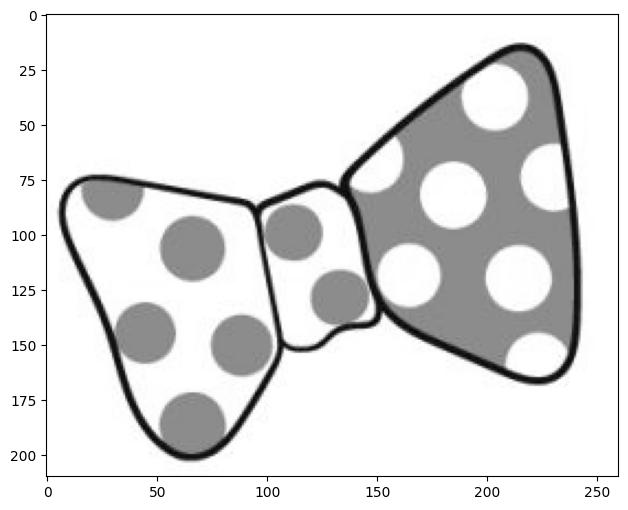

In [9]:
object5 = grayscale_image[870:1080, 2250:2510]
plt.imshow(object5, cmap = 'gray')
objects.append(object5)

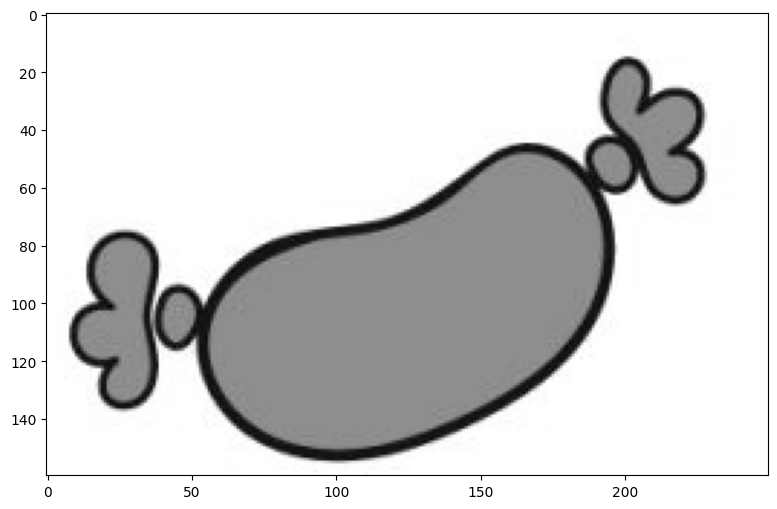

In [10]:
object6 = grayscale_image[1200:1360,2050:2300]
plt.imshow(object6, cmap ='gray')
objects.append(object6)

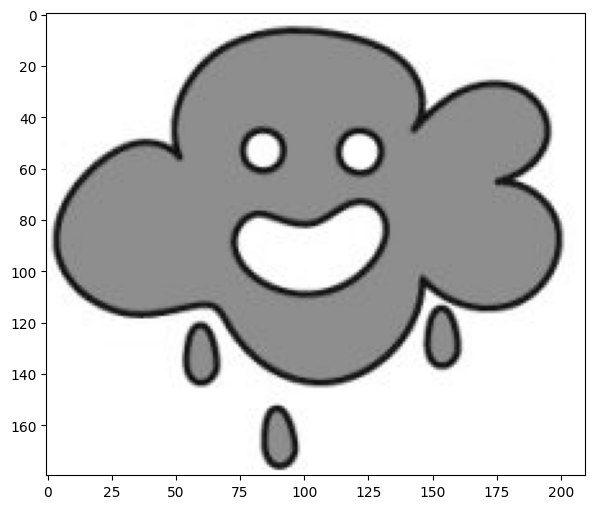

In [11]:
object7 = grayscale_image[1470:1650,1850:2060]
plt.imshow(object7, cmap ='gray')
objects.append(object7)

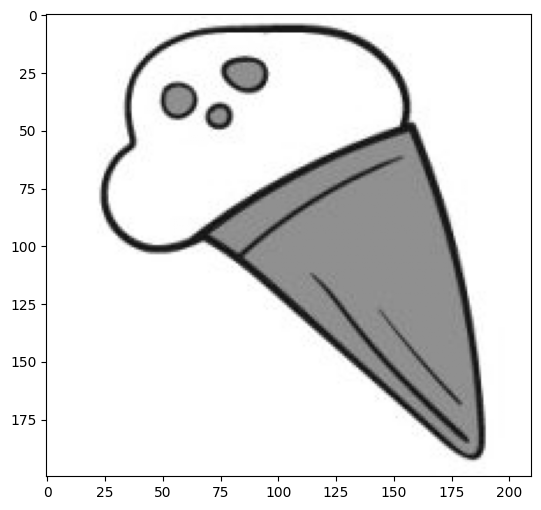

In [12]:
object8 = grayscale_image[1400:1600,2250:2460]
plt.imshow(object8, cmap ='gray')
objects.append(object8)

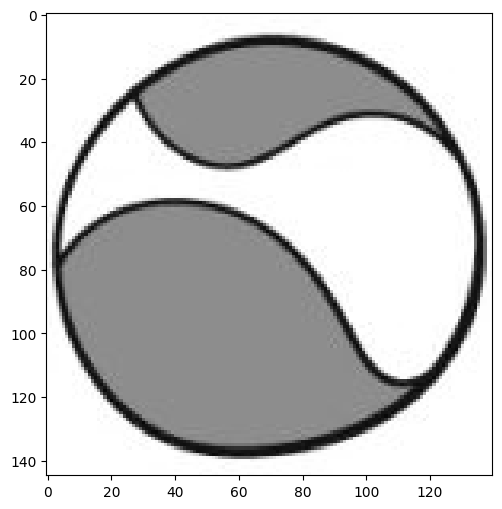

In [13]:
object9 = grayscale_image[1775:1920,2000:2140]
plt.imshow(object9, cmap ='gray')
objects.append(object9)

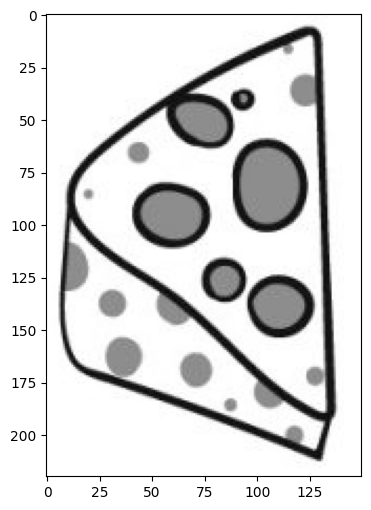

In [14]:
object10 = grayscale_image[1800:2020,2250:2400]
plt.imshow(object10, cmap ='gray')
objects.append(object10)

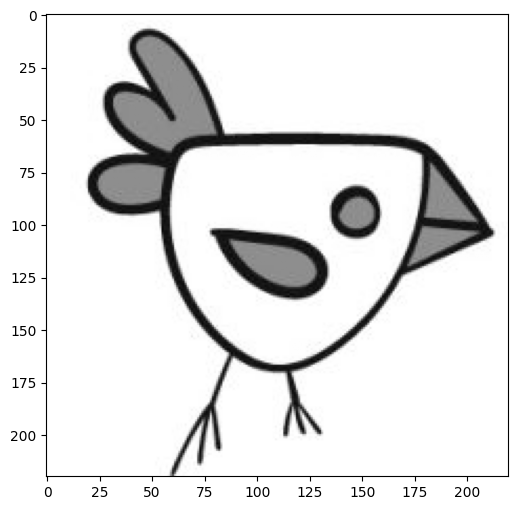

In [15]:
object11 = grayscale_image[2085:2305, 1900: 2120]
plt.imshow(object11, cmap ='gray')
objects.append(object11)

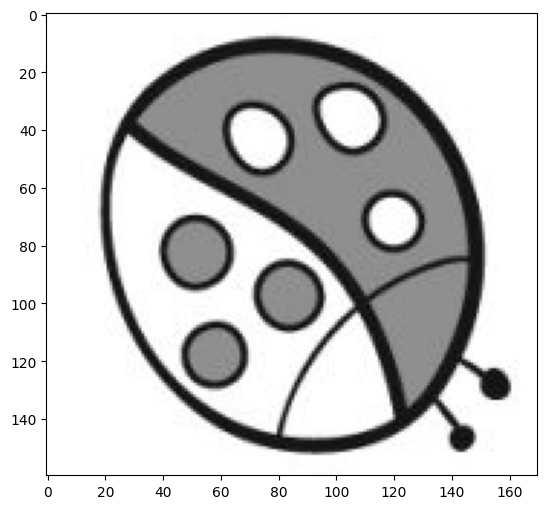

In [16]:
object12 = grayscale_image[2240:2400,2300:2470]
plt.imshow(object12, cmap ='gray')
objects.append(object12)

In [ ]:
objects.clear()

In [17]:
def edge_detection(image):
  blur_image = cv2.GaussianBlur(image, (5, 5), 0) # apply Gaussian Blur to reduce noise.
  edge = cv2.Canny(blur_image, 100, 200) # apply Canny to hightlight edge of the image
  return edge

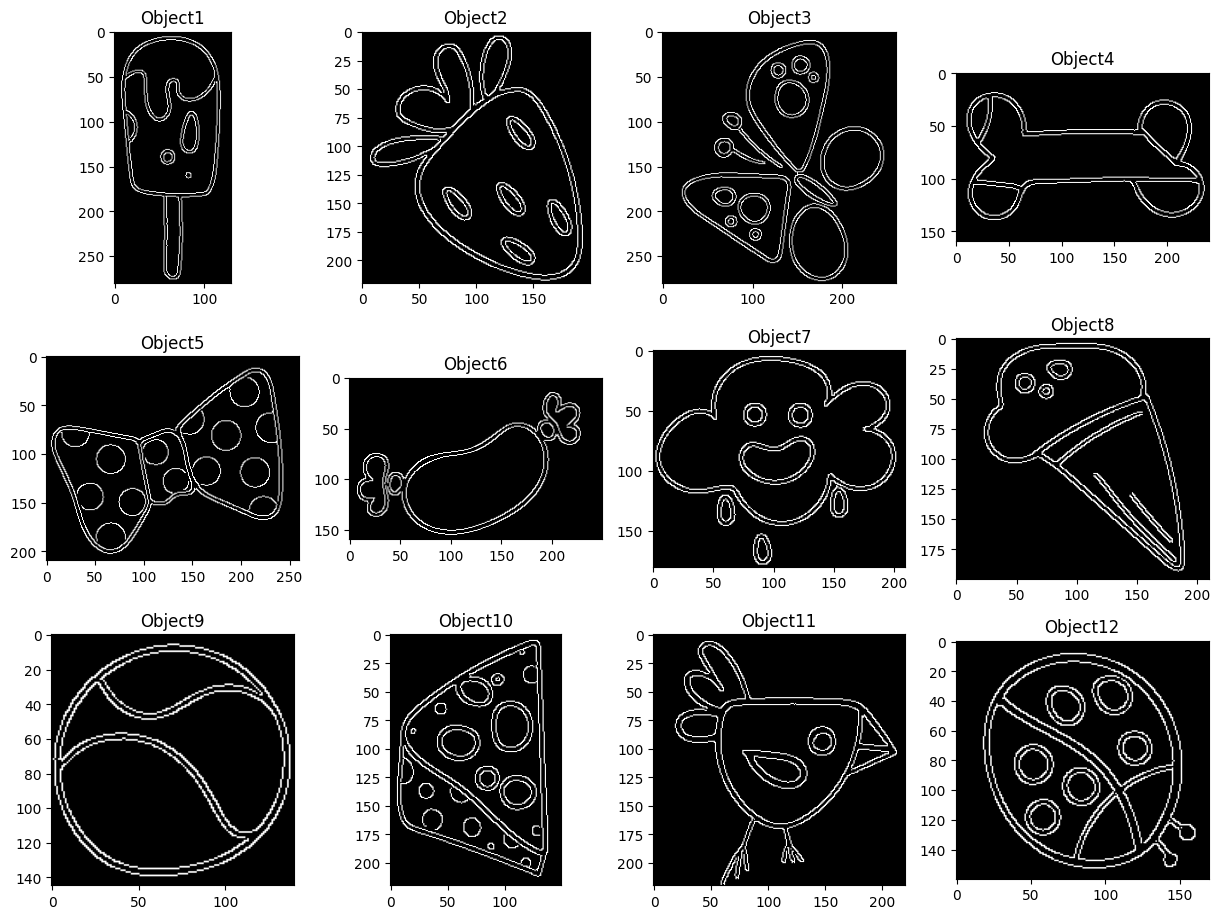

In [18]:
edges = []
for object in objects:
  edge = edge_detection(object)
  edges.append(edge)

plt.figure(figsize = (15, 15))
for i in range(len(objects)):
  plt.subplot(4, 4, i + 1)
  plt.imshow(edges[i], cmap = 'gray')
  plt.title('Object' + str(i + 1))
plt.show()

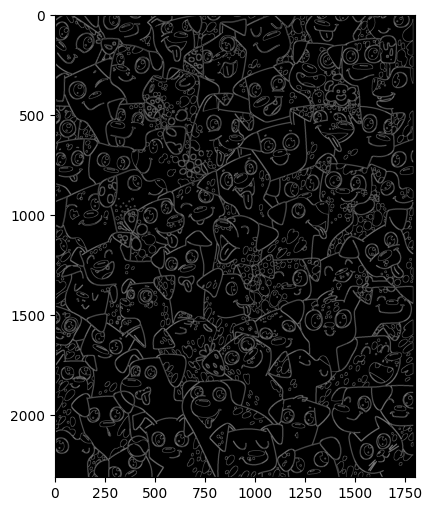

In [19]:
edge_image = edge_detection(crop_image)
plt.imshow(edge_image, cmap = 'gray')

In [21]:
output_image = crop_image.copy()

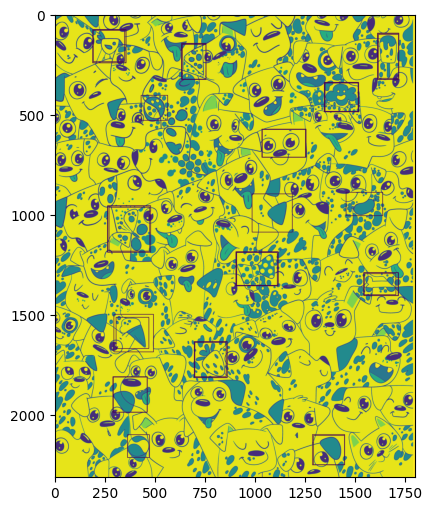

In [ ]:
def template_matching(target, template):

    value = 0
    best_loc = None
    best_scale = None
    threshold = 0.4

    for scale in np.linspace(0.5, 1.5, 500):
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

        result = cv2.matchTemplate(target, resized_template, cv2.TM_CCOEFF_NORMED)

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val >= threshold and max_val > value:
            value = max_val
            best_loc = max_loc
            best_scale = scale

    if best_loc is not None:
        return best_loc, best_scale
    else:
        return None, None

locations = []
scales = []
for obj in objects:
    loc, scale = template_matching(output_image, obj)
    locations.append(loc)
    scales.append(scale)


for i, loc in enumerate(locations):
    if loc is not None:
        template_shape = (int(objects[i].shape[1] * scales[i]), int(objects[i].shape[0] * scales[i]))
        cv2.rectangle(output_image, loc, (loc[0] + template_shape[0], loc[1] + template_shape[1]), (0, 0, 255), 2)

plt.imshow(output_image)
plt.show()


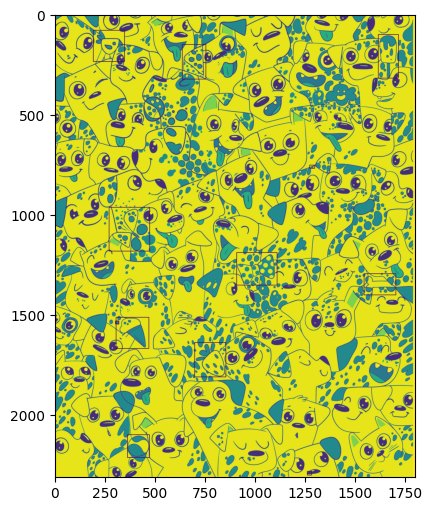

In [22]:
def template_matching(target, template):

    value = 0
    best_loc = None
    best_scale = None
    threshold = 0.4

    for scale in np.linspace(0.1, 1.5, 400):
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

        result = cv2.matchTemplate(target, resized_template, cv2.TM_CCOEFF_NORMED)

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val >= threshold and max_val > value:
            value = max_val
            best_loc = max_loc
            best_scale = scale

    if best_loc is not None:
        return best_loc, best_scale
    else:
        return None, None

locations = []
scales = []
for obj in objects:
    loc, scale = template_matching(output_image, obj)
    locations.append(loc)
    scales.append(scale)


for i, loc in enumerate(locations):
    if loc is not None:
        template_shape = (int(objects[i].shape[1] * scales[i]), int(objects[i].shape[0] * scales[i]))
        cv2.rectangle(output_image, loc, (loc[0] + template_shape[0], loc[1] + template_shape[1]), (0, 0, 255), 2)

plt.imshow(output_image)
plt.show()


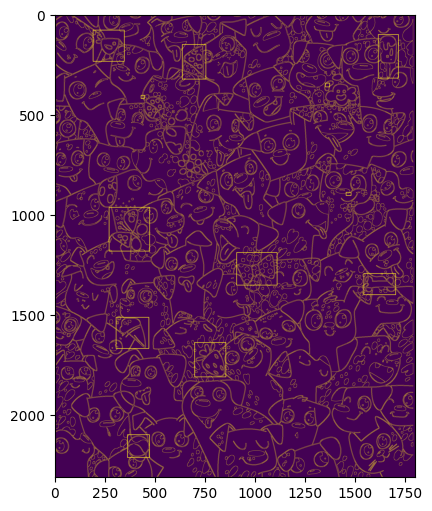

In [23]:
def template_matching(target, template):

    value = 0
    best_loc = None
    best_scale = None
    threshold = 0.4

    for scale in np.linspace(0.5, 1.5, 500):
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

        result = cv2.matchTemplate(target, resized_template, cv2.TM_CCOEFF_NORMED)

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val >= threshold and max_val > value:
            value = max_val
            best_loc = max_loc
            best_scale = scale

    if best_loc is not None:
        return best_loc, best_scale
    else:
        return None, None

output_edge_image = edge_image.copy()
edge_locations = []
edge_scales = []
for edge in edges:
    edge_loc, edge_scale = template_matching(output_edge_image, edge)
    edge_locations.append(edge_loc)
    edge_scales.append(edge_scale)


for i, loc in enumerate(edge_locations):
    if loc is not None:
        template_shape = (int(edges[i].shape[1] * scales[i]), int(edges[i].shape[0] * scales[i]))
        cv2.rectangle(output_edge_image, loc, (loc[0] + template_shape[0], loc[1] + template_shape[1]), (255, 255, 255), 2)

plt.imshow(output_edge_image)
plt.show()


In [ ]:
for edge in edges:
  w, h = edge.shape[::-1]
  result = cv2.matchTemplate(edge_image, edge, cv2.TM_CCOEFF_NORMED)

  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

  top_left = max_loc

  bottom_right = (top_left[0] + w, top_left[1] + h)

  cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)

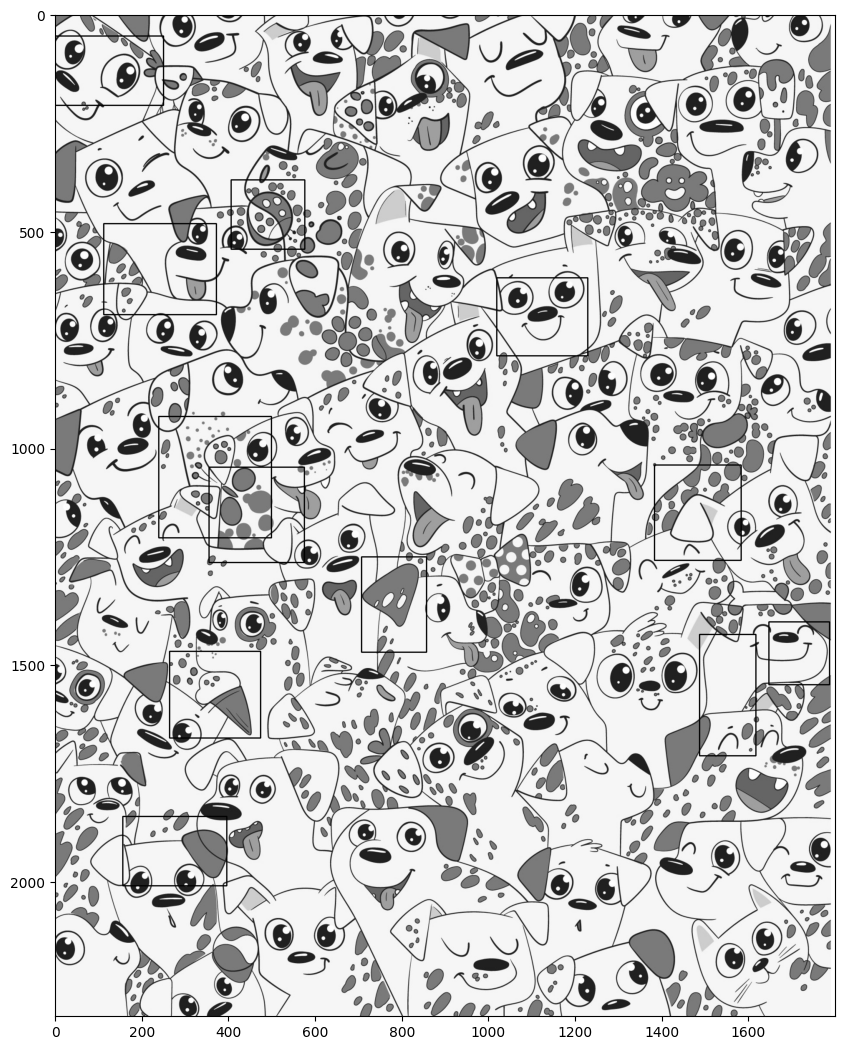

In [ ]:
output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(13, 13))
plt.imshow(output_image)
plt.show()

Find 3/12 objects (ko scale)

Find 9/12 objects (scale 0.1 to 1.5 with 400 random values).

Find 12/12 objects (scale 0.5 to 1.5 with 500 random values).

In [ ]:
w, h = object1.shape[0], object1.shape[1]

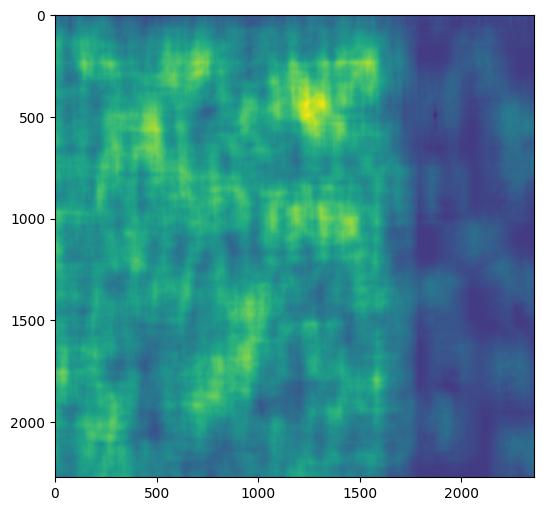

In [ ]:
result = cv2.matchTemplate(grayscale_image, object1, cv2.TM_SQDIFF_NORMED)
plt.imshow(result)

In [ ]:
threshold = 0.6
loc = np.where(result >= threshold)

for pt in zip(*loc[::-1]):
  cv2.rectangle(color_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 1)

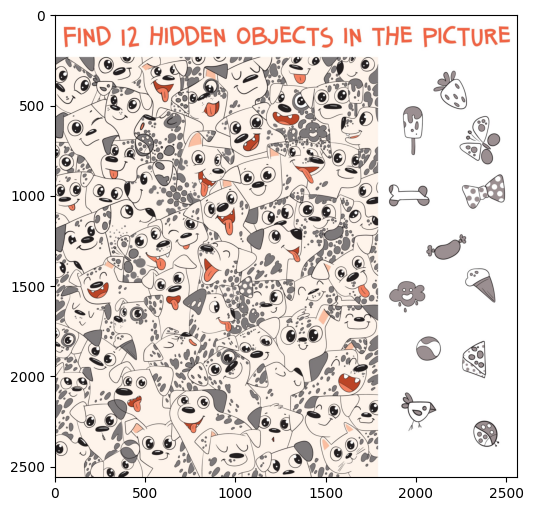

In [ ]:
output_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
plt.imshow(output_image)